In [2]:
# Decision Tree Classification: CART

# 1. Exploratory Data Analysis
# 2. Data Preprocessing & Feature Engineering
# 3. Modeling using CART
# 4. Hyperparameter Optimization with GridSearchCV
# 5. Final Model
# 6. Feature Importance
# 7. Analyzing Model Complexity with Learning Curves (BONUS)
# 8. Visualizing the Decision Tree
# 9. Extracting Decision Rules
# 10. Extracting Python/SQL/Excel Codes of Decision Rules
# 11. Prediction using Python Codes
# 12. Saving and Loading Model


In [3]:
!pip install pydotplus
!pip install skompiler
!pip install astor 
!pip install joblib
!pip install warings



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement warings (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for warings


In [4]:
import warnings
import joblib 
import pydotplus 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier , export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,validation_curve

In [5]:


pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=Warning)


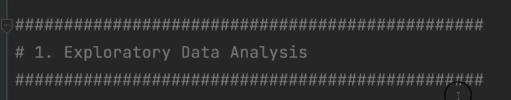

In [6]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


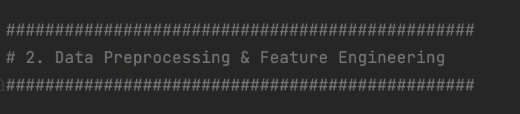

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


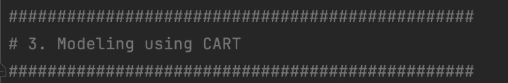

In [9]:
y = df["OUTCOME"]
X = df.drop(["OUTCOME"],axis=1)

In [10]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X,y)

In [11]:
#conf. matrix için y_pred
y_pred = cart_model.predict(X)

In [12]:
#Auc için 1. sınıfa ait olma olasılıkları :

In [13]:
y_prob = cart_model.predict_proba(X)[:,1]

In [14]:
print(classification_report(y,y_pred))
print(roc_auc_score(y,y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768

1.0


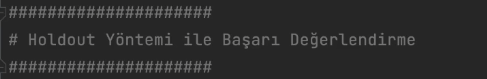

In [15]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.3,random_state=17)
cart_model =DecisionTreeClassifier(random_state =17).fit(X_train,y_train)
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:,1]
print(classification_report(y_train,y_pred))
print(roc_auc_score(y_train,y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

1.0


Eğitimde ki hata 1 bir problem olduğu sanısındayız modele görmediği bir veri seti ile test ile uygulayalım

In [16]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.3,random_state=45)
cart_model =DecisionTreeClassifier(random_state =17).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231

0.6558441558441559


OverFit olduğundan kaynaklı olduğu şühesindeyiz

In [17]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.3,random_state=45)
cart_model =DecisionTreeClassifier(random_state =17).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231

0.6558441558441559


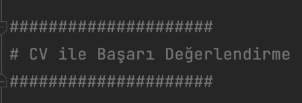

In [18]:
cart_model =DecisionTreeClassifier(random_state =17).fit(X,y)
cv_result = cross_validate(cart_model,
                           X,y,
                           cv=10,
                           scoring = ["accuracy","f1","roc_auc"])
cv_result

{'fit_time': array([0.00351548, 0.00342774, 0.00401258, 0.00299883, 0.00417519,
        0.00427485, 0.00536633, 0.00400972, 0.00498676, 0.00702786]),
 'score_time': array([0.00499988, 0.00450611, 0.00404596, 0.00450039, 0.00360656,
        0.00308442, 0.0040834 , 0.00404787, 0.00600529, 0.00500679]),
 'test_accuracy': array([0.67532468, 0.71428571, 0.66233766, 0.5974026 , 0.71428571,
        0.7012987 , 0.81818182, 0.83116883, 0.69736842, 0.73684211]),
 'test_f1': array([0.54545455, 0.54166667, 0.55172414, 0.39215686, 0.54166667,
        0.59649123, 0.73076923, 0.75471698, 0.5106383 , 0.61538462]),
 'test_roc_auc': array([0.64777778, 0.66074074, 0.6462963 , 0.54518519, 0.66074074,
        0.68481481, 0.79185185, 0.81037037, 0.64076923, 0.70769231])}

In [19]:
cv_result['test_accuracy'].mean()


np.float64(0.7148496240601504)

In [20]:
cv_result['test_f1'].mean()

np.float64(0.5780669232692448)

In [21]:
cv_result['test_roc_auc'].mean()

np.float64(0.6796239316239316)

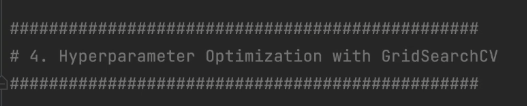

In [22]:
cart_model.get_params()
#min_samples_split
#max_depth


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [23]:
cart_params = {'max_depth':range(1,11),
              'min_samples_split':range(2,20)}

In [24]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=2).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [25]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [26]:
cart_best_grid.best_score_

np.float64(0.7500806383159324)

In [27]:
random = X.sample(1,random_state=45)
cart_best_grid.predict(random)

array([1])

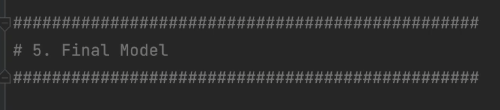

In [28]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_,random_state=17).fit(X,y)

In [29]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [30]:
# farklı bir alternatif...
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [31]:

cv_result = cross_validate(cart_final,
                           X,y,
                           cv=5,
                           scoring = ["accuracy","f1","roc_auc"])
cv_result

{'fit_time': array([0.00377131, 0.00254345, 0.00300074, 0.00327969, 0.00354099]),
 'score_time': array([0.00521564, 0.00460649, 0.00425982, 0.00402927, 0.00423145]),
 'test_accuracy': array([0.74675325, 0.68831169, 0.75324675, 0.79084967, 0.77124183]),
 'test_f1': array([0.59793814, 0.55555556, 0.59574468, 0.69230769, 0.63157895]),
 'test_roc_auc': array([0.81537037, 0.72333333, 0.80518519, 0.83962264, 0.8054717 ])}

In [32]:
cv_result['test_accuracy'].mean()



np.float64(0.7500806383159324)

In [33]:
cv_result['test_f1'].mean()

np.float64(0.614625004082526)

In [34]:
cv_result['test_roc_auc'].mean()

np.float64(0.797796645702306)

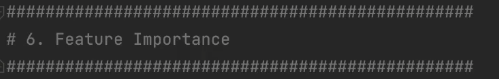

In [35]:
cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

In [36]:
def plot_importance (model, features, num=len (X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values (by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


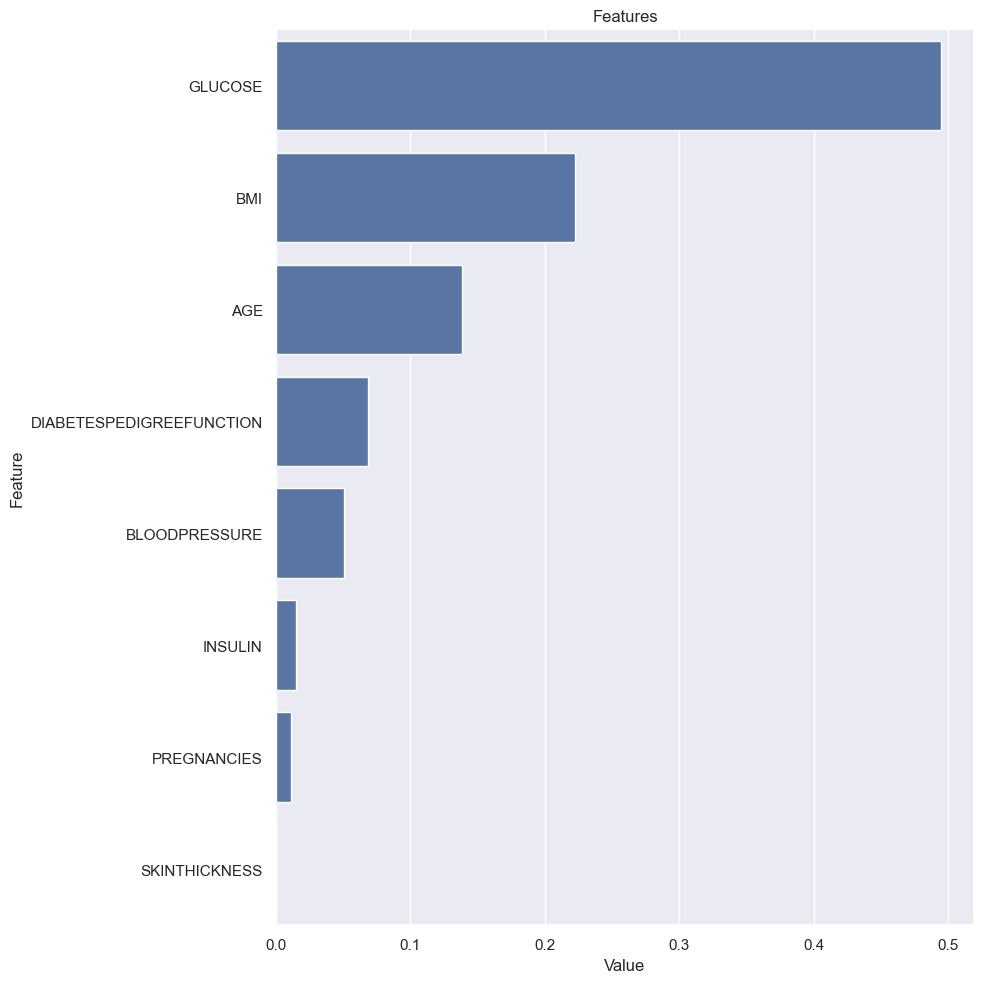

In [37]:
plot_importance(cart_final,X)

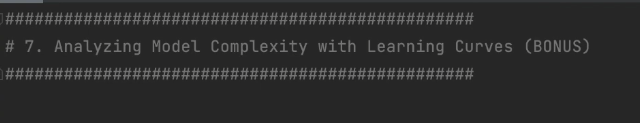

In [38]:
train_score , test_score = validation_curve(cart_final,X,y,
                                            param_name="max_depth",
                                            param_range=range(1,11),
                                            scoring = "roc_auc",
                                            cv=10)

In [39]:
mean_train_score = np.mean(train_score,axis=1)
mean_test_score = np.mean(test_score,axis=1)

In [40]:
mean_train_score

array([0.70729413, 0.78976751, 0.83642714, 0.87603684, 0.90819184,
       0.93528351, 0.96013549, 0.97716774, 0.98781586, 0.99359846])

In [41]:
mean_test_score

array([0.68127066, 0.74061681, 0.77597863, 0.77651852, 0.77109259,
       0.76239744, 0.74034473, 0.7137265 , 0.69966524, 0.69232051])

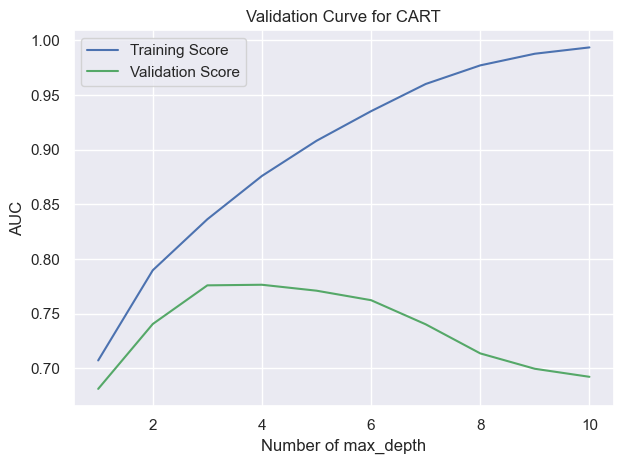

In [42]:

plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')
                    
plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')
         
                        
plt.title("Validation Curve for CART") 
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()


In [47]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv
    )
    
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    
    plt.plot(param_range, mean_train_score, label="Training Score", color='b')
    plt.plot(param_range, mean_test_score, label="Validation Score", color='g')
    
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

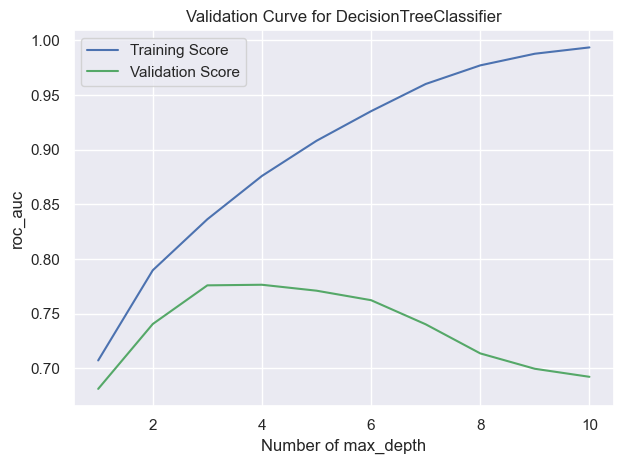

In [48]:
val_curve_params(cart_final,X,y,"max_depth",range(1,11))

In [49]:
cart_val_params= [['max_depth',range(1,11)],["min_samples_split",range(2,20)]]

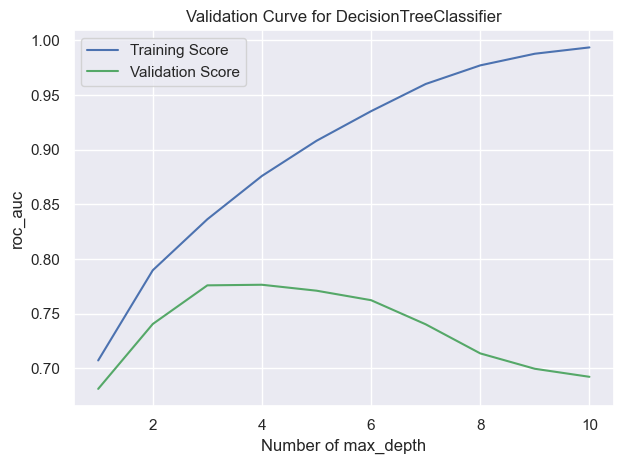

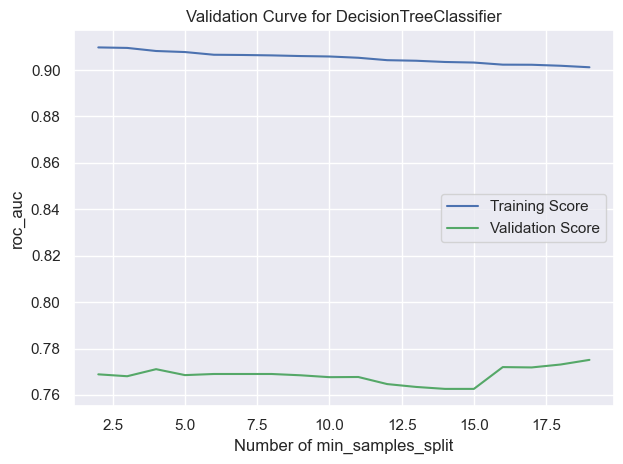

In [50]:
for i in range(len(cart_val_params)):
    val_curve_params(cart_model,X,y,cart_val_params[i][0],cart_val_params[i][1])

In [60]:
!pip install graphviz pydotplus



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
def tree_graph(model,col_names,file_name):
    tree_str = export_graphviz(model,feature_names=col_names,filled=True,out_file=None)
    graph=pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [63]:
#tree_graph(model=cart_final,col_names=X.columns,file_name="cart_final.png")

In [67]:
tree_rules = export_text(cart_final,feature_names=list(X.columns))
tree_rules

'|--- GLUCOSE <= 127.50\n|   |--- AGE <= 28.50\n|   |   |--- BMI <= 45.40\n|   |   |   |--- BMI <= 30.95\n|   |   |   |   |--- PREGNANCIES <= 7.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- PREGNANCIES >  7.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- BMI >  30.95\n|   |   |   |   |--- DIABETESPEDIGREEFUNCTION <= 0.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- DIABETESPEDIGREEFUNCTION >  0.50\n|   |   |   |   |   |--- class: 0\n|   |   |--- BMI >  45.40\n|   |   |   |--- BLOODPRESSURE <= 99.00\n|   |   |   |   |--- class: 1\n|   |   |   |--- BLOODPRESSURE >  99.00\n|   |   |   |   |--- class: 0\n|   |--- AGE >  28.50\n|   |   |--- BMI <= 26.35\n|   |   |   |--- BMI <= 9.65\n|   |   |   |   |--- class: 1\n|   |   |   |--- BMI >  9.65\n|   |   |   |   |--- class: 0\n|   |   |--- BMI >  26.35\n|   |   |   |--- GLUCOSE <= 99.50\n|   |   |   |   |--- GLUCOSE <= 28.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- GLUCOSE >  28.50\n|   |   |  

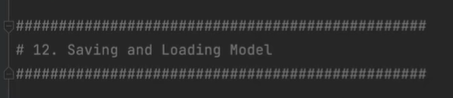

In [68]:
joblib.dump(cart_final,"cart_final.pkl")

['cart_final.pkl']

In [72]:

cart_model_from_disc = joblib.load("cart_final.pkl") 
cart_model_from_disc

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=17)

In [76]:
x=[12,13,20,23,4,55,12,7]
cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1])